In [1]:
# 問題1

from __future__ import print_function
import tensorflow as tf
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import BatchNormalization
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.utils import to_categorical
import numpy as np
import pylab as plt
from keras import backend as K

In [2]:
# 単語の種類数
max_features = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])
display("1レコードに単語のインデックスの配列が格納されてる。よってサイズはレコード毎に異なる。")
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_train[2]))

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


'1レコードに単語のインデックスの配列が格納されてる。よってサイズはレコード毎に異なる。'

218
189
141


In [4]:
display("0がnegative, 1がpositive")
print(pd.Series(y_train).value_counts())
pd.DataFrame(pd.Series(y_train).describe()).transpose()

'0がnegative, 1がpositive'

1    12500
0    12500
dtype: int64


,count,mean,std,min,25%,50%,75%,max
0,25000.0,0.5,0.50001,0.0,0.0,0.5,1.0,1.0


In [5]:
# 単語index情報取得
word_index = imdb.get_word_index()
inverted_word_index = {v: k for k, v in word_index.items()}

In [6]:
def decode_review(index):
    return ' '.join([inverted_word_index.get(i, '?') for i in x_train[index]])

display("サンプルでレビュー内容確認")
print("review 0: ", decode_review(0))
print("review 1: ", decode_review(1))
print("review 5: ", decode_review(5))

'サンプルでレビュー内容確認'

review 0:  the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from o

In [7]:
# 80以下のレビューを取得してみる
for i, r in enumerate(x_train):
    n_words = len(r)
    if n_words < 80:
        print(i, " ", n_words)
        break

5   43


In [8]:
maxlen = 80
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [9]:
display("pad_sequences後のサンプルでレビュー内容確認")
display("足りない場合は、先頭から0埋め, 80以上ある場合は後ろから80つのみ残す")
print("review 0: ", decode_review(0))
print("len review 0: ", len(x_train[0]))
print("review 1: ", decode_review(1))
print("review 5: ", x_train[5])
print("review 5 index: ", decode_review(5))

'pad_sequences後のサンプルでレビュー内容確認'

'足りない場合は、先頭から0埋め, 80以上ある場合は後ろから80つのみ残す'

review 0:  for anyone of and br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of script their with her nobody most that with wasn't to with armed acting watch an for with heartfelt film want an
len review 0:  80
review 1:  better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them
review 5:  [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   

In [32]:
# Embeddingの動き確認
model = Sequential()
model.add(Embedding(max_features, 128))
model.compile(optimizer='rmsprop', loss='mse')
pred = model.predict(x_train)

281/281 [==============================] - 0s 846us/step


In [11]:
display("1単語が128のベクトル表現に変換される")
print(pred.shape)
pred[0][0]

'1単語が128のベクトル表現に変換される'

(25000, 80, 128)


array([ 4.93720807e-02, -3.10738813e-02, -3.21516879e-02, -4.27494310e-02,
        2.54805014e-03,  1.44299902e-02,  8.21354240e-03,  2.99954675e-02,
       -4.49228771e-02, -5.09332865e-04,  3.17510627e-02, -5.75900078e-04,
        4.55944873e-02,  3.51754315e-02, -3.87042761e-03, -3.97552736e-02,
       -4.01902199e-02, -1.74035206e-02, -4.70255017e-02,  2.30382346e-02,
       -4.30484302e-02, -3.14797089e-03, -4.23216112e-02, -2.91020870e-02,
        3.57597582e-02,  1.11415498e-02, -2.62219794e-02, -3.89935821e-03,
        4.86587547e-02,  3.78889702e-02,  2.57299431e-02, -2.94105411e-02,
        2.03579329e-02,  4.53977697e-02, -3.59042771e-02,  1.94749497e-02,
       -4.34799679e-02, -2.56086830e-02,  6.93199784e-03,  4.04089577e-02,
        3.12161185e-02,  1.24098435e-02, -2.56370548e-02, -7.85095617e-03,
        2.80260928e-02, -7.97851011e-03, -5.13328239e-03,  1.29214413e-02,
       -1.23767033e-02, -4.79261875e-02, -1.40193813e-02, -2.91700717e-02,
       -3.41240764e-02, -

In [12]:
### 各手法比較前の統一パラメータ
n_node = 128
epochs = 10
batch_size = 32

In [13]:
### LSTM
# network構成定義
model = Sequential()
# Embeddingにより単語indexをベクトル化, 複数の文章を入力すると似た使われ方をしている単語は近いベクトル表現になる。
model.add(Embedding(max_features, n_node))
# 128次元に
model.add(LSTM(n_node, dropout=0.2, recurrent_dropout=0.2))
# 最終的な出力は2値
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
%%time
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

Epoch 1/10
782/782 [==============================] - 127s 159ms/step - loss: 0.4278 - accuracy: 0.7982 - val_loss: 0.3687 - val_accuracy: 0.8384
Epoch 2/10
782/782 [==============================] - 112s 143ms/step - loss: 0.2558 - accuracy: 0.8956 - val_loss: 0.3789 - val_accuracy: 0.8321
Epoch 3/10
782/782 [==============================] - 116s 148ms/step - loss: 0.1654 - accuracy: 0.9373 - val_loss: 0.4728 - val_accuracy: 0.8309
Epoch 4/10
782/782 [==============================] - 119s 152ms/step - loss: 0.1048 - accuracy: 0.9618 - val_loss: 0.5180 - val_accuracy: 0.8262
Epoch 5/10
782/782 [==============================] - 116s 149ms/step - loss: 0.0737 - accuracy: 0.9744 - val_loss: 0.6548 - val_accuracy: 0.8232
Epoch 6/10
782/782 [==============================] - 114s 146ms/step - loss: 0.0503 - accuracy: 0.9833 - val_loss: 0.7915 - val_accuracy: 0.8219
Epoch 7/10
782/782 [==============================] - 111s 142ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.7831 -

In [15]:
### SimpleRNN
# network構成定義
model = Sequential()
# Embeddingにより単語indexをベクトル化, 複数の文章を入力すると似た使われ方をしている単語は近いベクトル表現になる。
model.add(Embedding(max_features, n_node))
# 128次元に
model.add(SimpleRNN(n_node, dropout=0.2, recurrent_dropout=0.2))
# 最終的な出力は2値
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
%%time
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

Epoch 1/10
782/782 [==============================] - 34s 42ms/step - loss: 0.6953 - accuracy: 0.5262 - val_loss: 0.6795 - val_accuracy: 0.5566
Epoch 2/10
782/782 [==============================] - 30s 38ms/step - loss: 0.6315 - accuracy: 0.6325 - val_loss: 0.6125 - val_accuracy: 0.6475
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 0.5152 - accuracy: 0.7484 - val_loss: 0.5842 - val_accuracy: 0.6865
Epoch 4/10
782/782 [==============================] - 33s 43ms/step - loss: 0.5030 - accuracy: 0.7557 - val_loss: 0.5458 - val_accuracy: 0.7475
Epoch 5/10
782/782 [==============================] - 40s 51ms/step - loss: 0.4230 - accuracy: 0.8116 - val_loss: 0.5213 - val_accuracy: 0.7608
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 0.3921 - accuracy: 0.8299 - val_loss: 0.5500 - val_accuracy: 0.7633
Epoch 7/10
782/782 [==============================] - 36s 46ms/step - loss: 0.3482 - accuracy: 0.8576 - val_loss: 0.4891 - val_accuracy:

In [17]:
### GRU
# network構成定義
model = Sequential()
# Embeddingにより単語indexをベクトル化, 複数の文章を入力すると似た使われ方をしている単語は近いベクトル表現になる。
model.add(Embedding(max_features, n_node))
# 128次元に
model.add(GRU(n_node, dropout=0.2, recurrent_dropout=0.2))
# 最終的な出力は2値
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [18]:
%%time
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

Epoch 1/10
782/782 [==============================] - 110s 137ms/step - loss: 0.4346 - accuracy: 0.7944 - val_loss: 0.3550 - val_accuracy: 0.8422
Epoch 2/10
782/782 [==============================] - 98s 126ms/step - loss: 0.2468 - accuracy: 0.9031 - val_loss: 0.3847 - val_accuracy: 0.8458
Epoch 3/10
782/782 [==============================] - 91s 116ms/step - loss: 0.1396 - accuracy: 0.9492 - val_loss: 0.4782 - val_accuracy: 0.8314
Epoch 4/10
782/782 [==============================] - 91s 116ms/step - loss: 0.0789 - accuracy: 0.9730 - val_loss: 0.5336 - val_accuracy: 0.8279
Epoch 5/10
782/782 [==============================] - 94s 120ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.6839 - val_accuracy: 0.8236
Epoch 6/10
782/782 [==============================] - 94s 120ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.8643 - val_accuracy: 0.8172
Epoch 7/10
782/782 [==============================] - 92s 118ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.8247 - val_a

結果

LSTM

```
score: 0.8601996302604675
accuracy: 0.8202400207519531
Wall time: 19min 19s
```

SimpleRNN

```
score: 0.6016728281974792
accuracy: 0.750760018825531
Wall time: 6min 7s
```

GRU
```
score: 1.1242400407791138
accuracy: 0.8162400126457214
Wall time: 15min 43s
```

精度: LSTM > GRU > SimpleRNN

速度: SimpleRNN > GRU > LSTM

In [19]:
### ConvLSTM2D
# データ作成
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float64)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float64)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

In [20]:
print(noisy_movies.shape)
print(shifted_movies.shape)

(1200, 15, 40, 40, 1)
(1200, 15, 40, 40, 1)


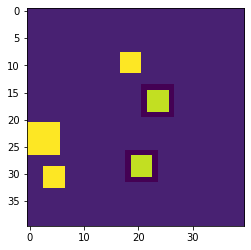

In [21]:
# 作成したデータのサンプル出力
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
# fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.1)
    fig.canvas.draw()

In [22]:
# ConvLSTM2Dを4回通す
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [23]:
%%time
seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=10, validation_split=0.05)
# epochs = 1
# batch_size = 10
# seq.fit(noisy_movies, shifted_movies, batch_size=batch_size,epochs=epochs, validation_split=0.05)

Epoch 1/10
10/10 [==============================] - 76s 7s/step - loss: 0.8336 - val_loss: 0.6905
Epoch 2/10
10/10 [==============================] - 66s 7s/step - loss: 0.8226 - val_loss: 0.6880
Epoch 3/10
10/10 [==============================] - 65s 7s/step - loss: 0.8130 - val_loss: 0.6854
Epoch 4/10
10/10 [==============================] - 66s 7s/step - loss: 0.8045 - val_loss: 0.6828
Epoch 5/10
10/10 [==============================] - 65s 6s/step - loss: 0.7965 - val_loss: 0.6798
Epoch 6/10
10/10 [==============================] - 65s 6s/step - loss: 0.7893 - val_loss: 0.6767
Epoch 7/10
10/10 [==============================] - 68s 7s/step - loss: 0.7819 - val_loss: 0.6734
Epoch 8/10
10/10 [==============================] - 64s 6s/step - loss: 0.7751 - val_loss: 0.6699
Epoch 9/10
10/10 [==============================] - 66s 7s/step - loss: 0.7686 - val_loss: 0.6660
Epoch 10/10
10/10 [==============================] - 66s 6s/step - loss: 0.7620 - val_loss: 0.6620
CPU times: user 1h 

1/1 [==============================] - 1s 678ms/step


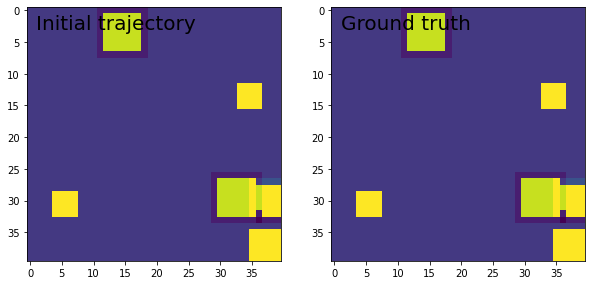

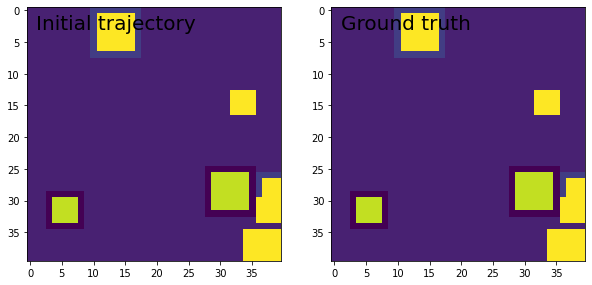

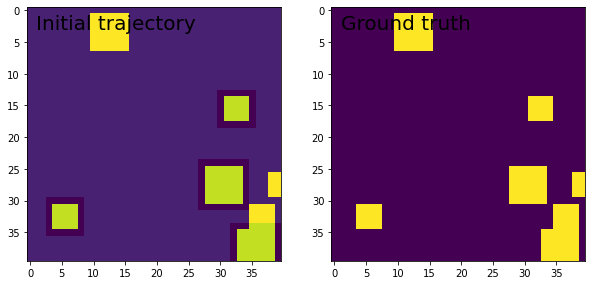

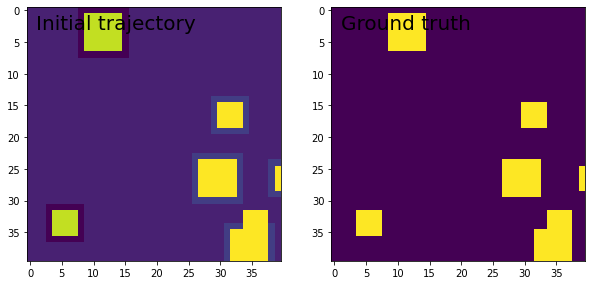

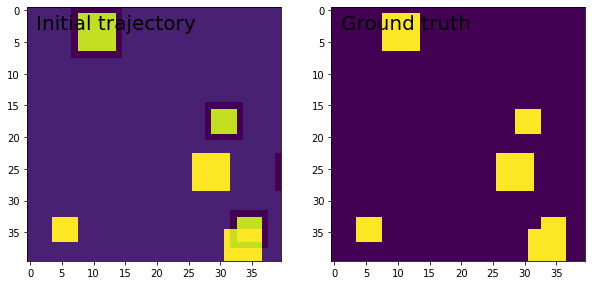

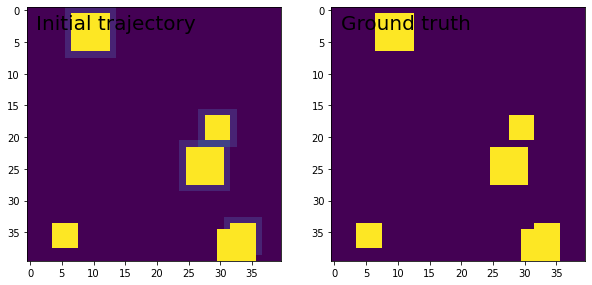

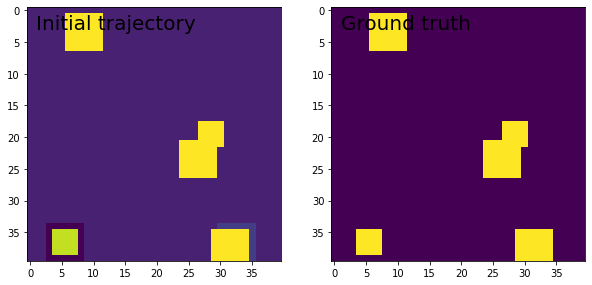

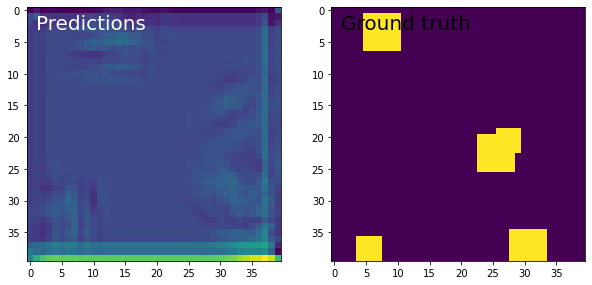

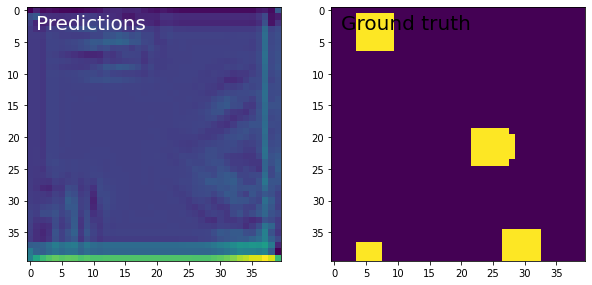

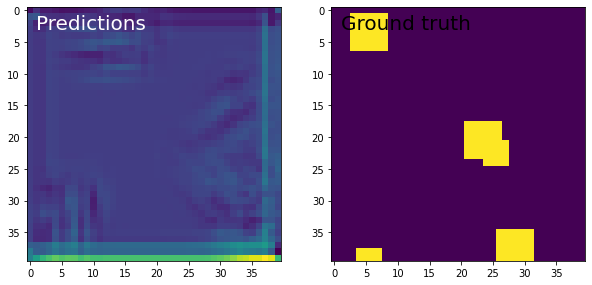

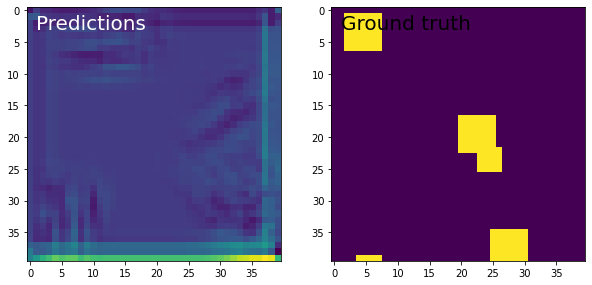

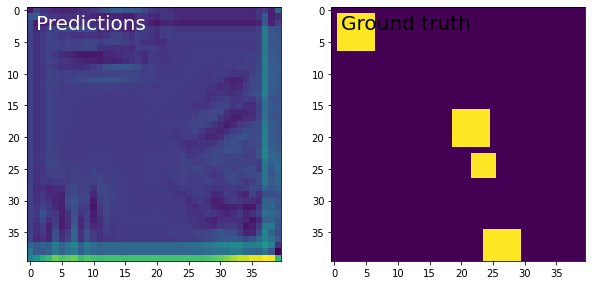

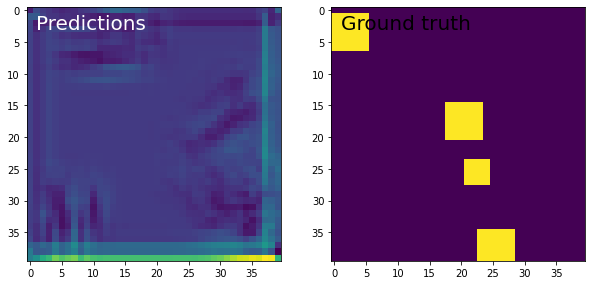

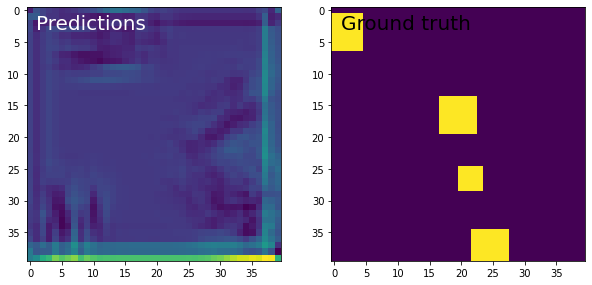

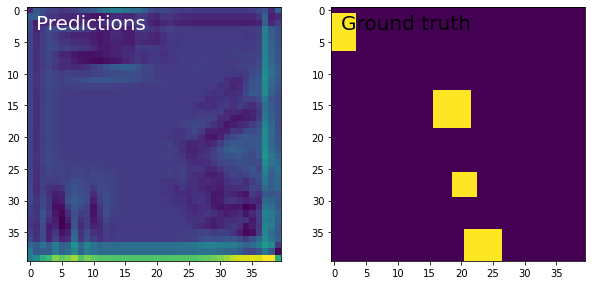

In [24]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::] 
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('result/conv_lstm/%i_animate.png' % (i + 1))

In [25]:
# 問題2

from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])
display("1レコードに単語のインデックスの配列が格納されてる。よってサイズはレコード毎に異なる。")
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_train[2]))
display("0がnegative, 1がpositive")
print(pd.Series(y_train).value_counts())
pd.DataFrame(pd.Series(y_train).describe()).transpose()
# 単語index情報取得
word_index = reuters.get_word_index()
inverted_word_index = {v: k for k, v in word_index.items()}

print("len word_index: ", len(word_index.keys()))

display("サンプルでレビュー内容確認")
print("review 0: ", decode_review(0))
print("review 1: ", decode_review(1))
print("review 5: ", decode_review(5))

(8982,)
(8982,)
(2246,)
(2246,)
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


'1レコードに単語のインデックスの配列が格納されてる。よってサイズはレコード毎に異なる。'

87
56
139


'0がnegative, 1がpositive'

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64
len word_index:  30979


'サンプルでレビュー内容確認'

review 0:  the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs
review 1:  the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs
review 5:  the in has would seven time 35 we're but 18 national adjusted with growth received vs been reuter growth received vs been have five 1 35 exchange farm same with did dlr vs been reuter did dlr vs have five so but 18 pr

In [27]:
### LSTM
# パラメータ
max_features = len(word_index.keys())
n_node = 128
batch_size = 32
epochs = 10
n_category = 46

In [28]:
maxlen = 80
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# TODO 別々で同じ値に対するoheになるのか要検証
y_train_ohe = to_categorical(y_train, num_classes=n_category)
y_test_ohe = to_categorical(y_test, num_classes=n_category)

In [29]:
### LSTM
# network構成定義
model = Sequential()
# Embeddingにより単語indexをベクトル化, 複数の文章を入力すると似た使われ方をしている単語は近いベクトル表現になる。
model.add(Embedding(max_features, n_node))
model.add(LSTM(n_node, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_category, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         3965312   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 46)                5934      
                                                                 
Total params: 4,102,830
Trainable params: 4,102,830
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [31]:
%%time
model.fit(x_train, y_train_ohe, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_ohe))
score, acc = model.evaluate(x_test, y_test_ohe, batch_size=batch_size)
print('score:', score)
print('accuracy:', acc)

Epoch 1/10
281/281 [==============================] - 40s 137ms/step - loss: 2.1919 - accuracy: 0.4403 - val_loss: 1.9483 - val_accuracy: 0.4412
Epoch 2/10
281/281 [==============================] - 36s 127ms/step - loss: 1.7371 - accuracy: 0.5463 - val_loss: 1.7210 - val_accuracy: 0.5699
Epoch 3/10
281/281 [==============================] - 35s 126ms/step - loss: 1.4886 - accuracy: 0.6214 - val_loss: 1.5426 - val_accuracy: 0.6175
Epoch 4/10
281/281 [==============================] - 36s 128ms/step - loss: 1.2022 - accuracy: 0.6908 - val_loss: 1.4340 - val_accuracy: 0.6447
Epoch 5/10
281/281 [==============================] - 36s 127ms/step - loss: 0.9677 - accuracy: 0.7468 - val_loss: 1.4099 - val_accuracy: 0.6376
Epoch 6/10
281/281 [==============================] - 34s 122ms/step - loss: 0.7865 - accuracy: 0.7974 - val_loss: 1.4827 - val_accuracy: 0.6358
Epoch 7/10
281/281 [==============================] - 36s 130ms/step - loss: 0.6460 - accuracy: 0.8338 - val_loss: 1.4384 - val_ac

#### 問題3

- RNN

時系列データや前後に関連性のあるデータを処理で有効なニューラルネットワーク。通常のニューラルネットに加えて一つ前のデータの値も各ノードの算出に含む形で構成される。

- SimpleRNNCell

独自のRNN層を組む際のRNN層の各cellの定義。以下のようにRNNの引数に入れて利用する。

```
RNN(SimpleRNNCell(1, activation=None), input_shape=(None, 1), return_sequences=True)
```

- GRUCell

GRUとはLSTMの代わり。LSTMより計算量が少ないが性能は変わらない。そのCell定義

- LSTMCell

RNNの拡張版。RNNは長期的な特徴に関して学習できない。最初の値が最後の値に与える影響は少なくなりやすく、勾配消失問題がおこう。それを解消するために
記憶セルや忘却ゲートなどを用意して長期的な特徴を考慮できるようにさせたもの。それのCell

- StackedRNNCells

Stacked LSTMとは、LSTMを何層も重ねたニューラルネットワーク。それを扱うためのcellのラッパー。以下のように複数のLSTMCellの配列を扱いやすいようにまとめられる。

```
rnn_cells = [tf.keras.layers.LSTMCell(128) for _ in range(2)]
stacked_lstm = tf.keras.layers.StackedRNNCells(rnn_cells)
lstm_layer = tf.keras.layers.RNN(stacked_lstm)
```

- CuDNNGRU

cuDNNはDNNをGPUで高速化できるようにするライブラリ。そのGRU

- CuDNNLSTM

上のLSTM版